# Stock Price Prediction using a LSTM Model and Transfer Learning

Seita Yoshifusa, Andreas Koni, Jimmy Hou

## Package Installation

In [1]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

- **Pandas (`import pandas as pd`):**
   - Data manipulation and analysis.
   - Used for loading, preprocessing, and organizing stock price data.

- **NumPy (`import numpy as np`):**
   - Fundamental package for numerical computing.
   - Used for numerical operations and transformations on stock price data.

- **Matplotlib (`import matplotlib.pyplot as plt`):**
   - Plotting library for creating visualizations.
   - Used for visualizing stock price data, including historical price movements and model predictions.

- **PyTorch (`import torch` and `import torch.nn as nn`):**
   - Deep learning framework.
   - Used for implementing and training LSTM models for stock price prediction.


# Data Preprocessing For Boeing Dataset

In [2]:
# Read Boeing Stock Price Dataset
BA = pd.read_csv("BA.csv")
BA

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-03-05,130.399994,130.800003,128.690002,128.789993,110.693947,4095200
1,2014-03-06,129.009995,129.369995,128.029999,128.860001,110.754135,3595900
2,2014-03-07,129.750000,130.160004,128.070007,128.539993,110.479073,4297800
3,2014-03-10,126.510002,127.279999,124.760002,126.889999,109.060913,7039200
4,2014-03-11,127.029999,127.269997,125.620003,125.669998,108.012360,4190000
...,...,...,...,...,...,...,...
2513,2024-02-28,201.139999,208.100006,200.179993,207.000000,207.000000,9654700
2514,2024-02-29,206.440002,206.619995,202.699997,203.720001,203.720001,6670300
2515,2024-03-01,204.000000,205.059998,199.009995,200.000000,200.000000,11591000
2516,2024-03-04,199.500000,201.539993,196.919998,200.539993,200.539993,7213900


In [3]:
# Filter only "Date" and "Close" columns
BA = BA[['Date', 'Close']]
BA

,Date,Close
0,2014-03-05,128.789993
1,2014-03-06,128.860001
2,2014-03-07,128.539993
3,2014-03-10,126.889999
4,2014-03-11,125.669998
...,...,...
2513,2024-02-28,207.000000
2514,2024-02-29,203.720001
2515,2024-03-01,200.000000
2516,2024-03-04,200.539993


In [4]:
# Read Airbus Stock Price Dataset
Airbus = pd.read_csv("AIR.PA.csv")
Airbus

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-03-05,53.130001,53.139999,52.330002,52.750000,44.588909,2306782
1,2014-03-06,53.099998,53.470001,52.720001,52.959999,44.766422,1972086
2,2014-03-07,52.860001,52.880001,51.290001,51.310001,43.371696,3579832
3,2014-03-10,51.200001,51.250000,49.935001,50.490002,42.678558,3676565
4,2014-03-11,50.560001,51.200001,50.259998,50.360001,42.568668,1931312
...,...,...,...,...,...,...,...
2558,2024-02-28,148.500000,153.759995,148.160004,153.720001,153.720001,1324901
2559,2024-02-29,153.399994,154.080002,152.139999,152.940002,152.940002,1661200
2560,2024-03-01,154.000000,154.119995,152.240005,152.639999,152.639999,726414
2561,2024-03-04,152.520004,155.860001,152.300003,155.360001,155.360001,762008


In [5]:
# Filter only "Date" and "Close" columns
Airbus = Airbus[['Date', 'Close']]
Airbus

,Date,Close
0,2014-03-05,52.750000
1,2014-03-06,52.959999
2,2014-03-07,51.310001
3,2014-03-10,50.490002
4,2014-03-11,50.360001
...,...,...
2558,2024-02-28,153.720001
2559,2024-02-29,152.940002
2560,2024-03-01,152.639999
2561,2024-03-04,155.360001


In [6]:
# Set the device to be the CPU for computation
# We chose CPU since our dataset is small, and CPU can compute in relatively short time
# We also won't be restricted by the limited computational time of Google Colab GPU
device = 'cpu'
device

'cpu'

In [7]:
def visualize_stock_price_movement(dataframe, stock_name):
    """
    Plots the desginated company stock closing price over time
    Args:
      dataframe: dataset to visualize
      stock_name: name of the company
    """
    # Simple visualization of stock price movement
    plt.plot(dataframe['Date'], dataframe['Close'])

    # Add title to the plot with stock name
    plt.title(f'{stock_name} Stock Price Movement')

    # Add labels to the x-axis and y-axis
    plt.xlabel('Date')
    plt.ylabel('Close Price')

    # Set the x-axis ticks interval to show every year for better readability
    plt.xticks(dataframe['Date'][::252], rotation=45)

    # Show the plot
    plt.show()

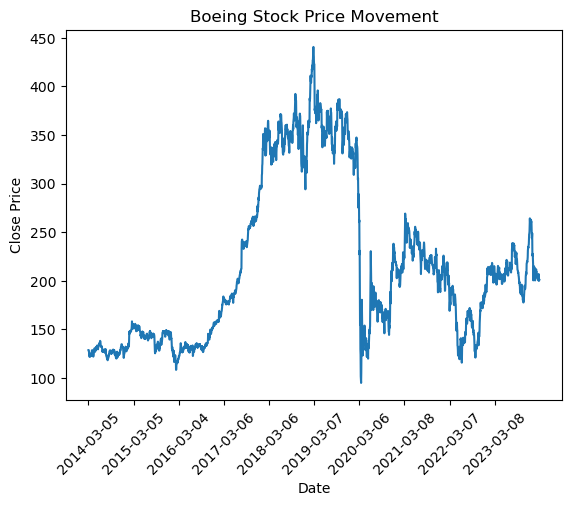

In [8]:
# Visualize stock price movement for Boeing dataset
visualize_stock_price_movement(BA, 'Boeing')

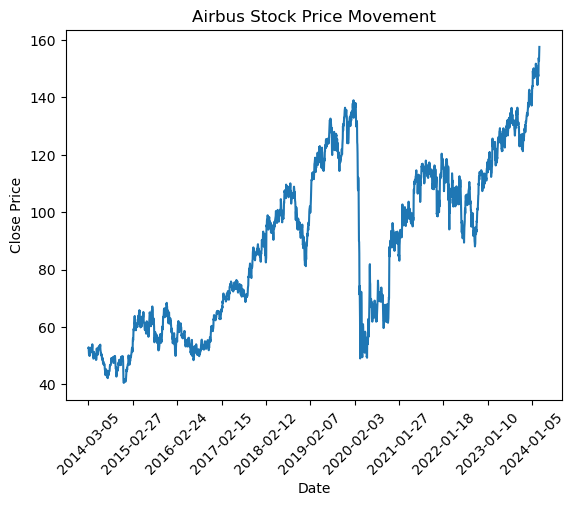

In [9]:
# Visualize stock price movement for Airbus dataset
visualize_stock_price_movement(Airbus, 'Airbus')

In [10]:
from copy import deepcopy as dc
from sklearn.preprocessing import MinMaxScaler

- **copy (`from copy import deepcopy as dc`)**:
  - Provides functions for creating deep copies of objects.

- **MinMaxScaler (`from sklearn.preprocessing import MinMaxScaler`)**:
  - A scaler class from scikit-learn for scaling features to a specified range, commonly used for preprocessing numerical data.

In [11]:
# Set scaler as MinMaxScaler from ranger -1 to 1. It's global variable.
scaler = MinMaxScaler(feature_range=(-1, 1))

**Functionality of data_processing**

1. **Deep Copy of DataFrame**: The input DataFrame `df` is deep-copied to avoid modifying the original data. This step ensures that the original DataFrame remains unchanged.

2. **Convert Date Column to Datetime Format**: The 'Date' column of the DataFrame is converted to datetime format using `pd.to_datetime`. This conversion allows for easier manipulation and analysis of date-related data.

3. **Set Date Column as Index**: The 'Date' column is set as the index of the DataFrame using `df.set_index('Date', inplace=True)`. This step is common in time series analysis to facilitate time-based indexing.

4. **Create Lagged Features**: Lagged features are created for each time step specified by the `lookback` parameter. For each lagged feature, the 'Close' prices are shifted to create lagged values. This step allows the model to capture temporal dependencies in the data.

5. **Drop Rows with NaN Values**: Rows with NaN values resulting from the shifting operation are dropped using `df.dropna(inplace=True)`. This ensures that the dataset is clean and ready for further processing.

6. **Convert DataFrame to NumPy Array**: The preprocessed DataFrame is converted to a NumPy array using `df.to_numpy()`. This step prepares the data for splitting into training and testing sets.

7. **Split Data into Train and Test Sets**: The dataset is split into training and testing sets using the `int(len(shifted_np) * 0.8)` rule, where 80% of the data is allocated to training and 20% to testing.

8. **Standardize the Data**: The training and testing sets are standardized separately using `scaler.fit_transform(train_data)` and `scaler.transform(test_data)`. Standardization ensures that all features have a similar scale, which can improve the performance of machine learning models.

9. **Organize Predictor Matrix and Target Variables**: Predictor matrices (`X_train` and `X_test`) and target variables (`y_train` and `y_test`) are created for both the training and testing sets. This involves extracting the lagged features as predictor variables and the current 'Close' prices as target variables.

10. **Convert Data to PyTorch Tensors**: The training and testing sets are converted to PyTorch tensors of type float using `torch.tensor(...).float()`. This step prepares the data for input into the LSTM model, which typically operates on tensors.

11. **Return Preprocessed Data**: Finally, the function returns the preprocessed training and testing data (`X_train`, `X_test`, `y_train`, `y_test`) for further use in training and evaluating the LSTM model.


In [12]:
def data_processing(df, lookback):
    '''
    Perform data preprocessing for LSTM model input.
    Transform input dataset into a form such that
    n time steps worth of columns would be added.

    Args:
    - df: pandas DataFrame containing the input data.
    - lookback: number of time steps to look back.

    Returns:
    - X_train: Preprocessed training feature data.
    - X_test: Preprocessed testing feature data.
    - y_train: Preprocessed training target data.
    - y_test: Preprocessed testing target data.
    '''
    # Make a deep copy of the input DataFrame to avoid modifying the original
    df = dc(df)

    # Convert the 'Date' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'])

    # Set the 'Date' column as the index
    df.set_index('Date', inplace=True)

    # Create lagged features for each time step
    for i in range(1, lookback + 1):
        # Shift the 'Close' prices to create lagged features
        df[f'Close(t-{i})'] = df['Close'].shift(i)

    # Drop rows with NaN values resulting from shifting
    df.dropna(inplace=True)

    # Convert the preprocessed DataFrame to a NumPy array
    shifted_np = df.to_numpy()

    # Split into train and test set
    split_ind = int(len(shifted_np) * 0.8)
    train_data = shifted_np[:split_ind]
    test_data = shifted_np[split_ind:]

    # Standardize the test set and training set separately
    train_data = scaler.fit_transform(train_data)
    test_data = scaler.transform(test_data)

    # Create predictor matrix and target for training set
    X_train = train_data[:, 1:]
    X_train = dc(np.flip(X_train, axis=1))
    y_train = X_train[:, 0]
    X_train = X_train.reshape((-1, lookback, 1))
    y_train = y_train.reshape((-1, 1))

    # Create predictor matrix and target for testing set
    X_test = test_data[:, 1:]
    X_test = dc(np.flip(X_test, axis=1))
    y_test = X_test[:, 0]
    X_test = X_test.reshape((-1, lookback, 1))
    y_test = y_test.reshape((-1, 1))

    # Convert the training and testing sets to PyTorch tensors of type float
    X_train = torch.tensor(X_train).float()
    X_test = torch.tensor(X_test).float()
    y_train = torch.tensor(y_train).float()
    y_test = torch.tensor(y_test).float()

    return X_train, X_test, y_train, y_test

In [13]:
# Data processing on Boeing dataset
X_BA_train, X_BA_test, y_BA_train, y_BA_test = data_processing(BA, lookback=7)

# Display the shapes of the converted training and testing sets
X_BA_train.shape, X_BA_test.shape, y_BA_train.shape, y_BA_test.shape

(torch.Size([2008, 7, 1]),
 torch.Size([503, 7, 1]),
 torch.Size([2008, 1]),
 torch.Size([503, 1]))

The `TimeSeriesDataset` class is essential for organizing time series data into a format compatible with PyTorch's Dataset interface. It customizes data loading, integrates with PyTorch's utilities, efficiently handles data access, and facilitates seamless integration of time series data with deep learning models.

In [14]:
# Define a custom dataset class for time series data
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
  '''
  A PyTorch dataset class for handling time series data.
  '''
  def __init__(self, X, y):
    """
    Constructor that sets predictor matrix and target variable for the time series dataset.

    Args:
      X: predictor matrix
      y: target variable
    """
    self.X = X
    self.y = y

  def __len__(self):
    """
    Returns the number of datapoints in the predictor matrix.
    """
    return len(self.X)

  def __getitem__(self, i):
    """
    Returns the specific element of the predictor matrix and target variable.

    Args:
      i: index
    Returns:
      Index of the predictor matrix and target variable
    """
    return self.X[i], self.y[i]

In [15]:
# Create Time Series Datasets of Boeing data
train_BA_dataset = TimeSeriesDataset(X_BA_train, y_BA_train)
test_BA_dataset = TimeSeriesDataset(X_BA_test, y_BA_test)

**Functionality of load_data**

1. **DataLoader Creation**:
   - It creates two `DataLoader` objects: one for the training data (`train_loader`) and another for the testing data (`test_loader`).
   - For the training data loader (`train_loader`), it sets the batch size to the specified `batch_size` and enables shuffling to enhance randomness during training.
   - For the testing data loader (`test_loader`), it also sets the batch size to the specified `batch_size` but disables shuffling since testing data should remain in its original order.

2. **Batch Processing**:
   - It iterates over the batches in the training data loader (`train_loader`) using a loop. However, it only processes the first batch for demonstration purposes.
   - For each batch, it moves the input features (`x_batch`) and target values (`y_batch`) to the specified `device` (e.g., CPU in this case).
   - It prints the shapes of the input features (`x_batch`) and target values (`y_batch`).

3. **Output**:
   - After printing the shapes of the first batch, the function returns the processed training and testing data loaders (`train_loader` and `test_loader`).

This function facilitates the preprocessing of time-series data into batches suitable for training and testing machine learning models.


In [16]:
from torch.utils.data import DataLoader

def load_data(train_dataset, test_dataset, batch_size, device):
    """
    Processes the designated training and testing sets into batches of designated size.

    Args:
      train_dataset: the training set to be processed
      test_dataset: the testing set to be processed
      batch_size: the size of the batches for the data to be split into
      device: device the code is running on
    Returns:
      train_loader: the processed training set
      test_loader: the processed testing set
    """
    # Create DataLoader for training data with specified batch size and shuffle
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # Create DataLoader for testing data with specified batch size and no shuffle
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Iterate over batches in the training data loader
    for _, batch in enumerate(train_loader):
        # Move the batch data to the specified device
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        # Print the shapes of the input features and target values for the first batch
        print("Shape of Input Features (X_batch):", x_batch.shape)
        print("Shape of Target Values (y_batch):", y_batch.shape)

        # Break the loop after processing the first batch
        break

    return train_loader, test_loader

In [17]:
# Load Boeing data
train_BA_loader, test_BA_loader = load_data(train_BA_dataset, test_BA_dataset, batch_size=16, device=device)

Shape of Input Features (X_batch): torch.Size([16, 7, 1])
Shape of Target Values (y_batch): torch.Size([16, 1])


# LSTM Model

Long Short-Term Memory (LSTM) is a type of recurrent neural network (RNN) architecture designed to address the vanishing gradient problem in standard RNNs. LSTMs are particularly effective in capturing long-term dependencies in sequential data, making them well-suited for time series datasets and stock price prediction tasks.

- The `LSTM` class defines the architecture of the LSTM model using PyTorch's `nn.Module`.
- The constructor `__init__` initializes the model with the specified hyperparameters, including the number of input neurons, hidden neurons, stacked layers, dropout rate, and weight decay.
- The `forward` method defines the forward pass of the model. It takes input data `x` and passes it through the LSTM layers, followed by a fully connected output layer. If dropout is specified, it applies dropout regularization.






In [18]:
class LSTM(nn.Module):
    """
    LSTM class defines the construction of the PyTorch LSTM model.

    Args:
    - input_size: Number of neurons in the input layer.
    - hidden_size: Number of neurons in each hidden layer.
    - num_stacked_layers: Number of hidden layers.
    - dropout: Dropout rate (default: 0.0).
    - weight_decay: Weight decay (default: 0.0).

    Attributes:
    - hidden_size: Number of neurons in each hidden layer.
    - num_stacked_layers: Number of hidden layers.
    - lstm: LSTM layer.
    - fc: Fully connected output layer.
    - dropout: Dropout layer if dropout rate > 0, otherwise None.
    - weight_decay: Weight decay.
    """

    def __init__(self, input_size, hidden_size, num_stacked_layers, dropout=0.0, weight_decay=0.0):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        # LSTM layer
        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers, batch_first=True)

        # Fully connected output layer
        self.fc = nn.Linear(hidden_size, 1)

        # Dropout layer if dropout rate > 0
        self.dropout = nn.Dropout(dropout) if dropout > 0.0 else None

        # Weight decay
        self.weight_decay = weight_decay

    def forward(self, x):
        """
        Forward pass through the LSTM model.

        Args:
        - x: Input data.

        Returns:
        - out: Output from the model.
        """
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)

        # Forward pass through the LSTM layer
        out, _ = self.lstm(x, (h0, c0))

        # Extract the output from the last time step
        out = self.fc(out[:, -1, :])

        # Apply dropout if specified
        if self.dropout:
            out = self.dropout(out)

        return out

Firstly we initialize the LSTM model with randomly chosen hyperparamemers, including `input_size`, `hidden_size`, and `num_stacked_layers`. A hyperparameter is a configuration setting that is external to the model and whose value cannot be directly estimated from the data. Since we choose them randomly, it is not guaranteed that the model can fit the dataset. That is why we need to do the Grid Search to find the best hyperparameters.

In [19]:
# Initialize LSTM model with randomly chosen parameters
lstm_model = LSTM(input_size=1, hidden_size=32, num_stacked_layers=2, dropout=0.2, weight_decay=0.001)

## Grid Search

Grid search is a hyperparameter optimization technique used to systematically search through a predefined set of hyperparameters for a machine learning model. It evaluates the model's performance using cross-validation on all possible combinations of hyperparameter values specified in a grid, selecting the combination that yields the best performance metric.

`skorch` is a bridge between scikit-learn and PyTorch, enabling PyTorch models to be used with scikit-learn's API for training and evaluation.

In [20]:
pip install skorch

Note: you may need to restart the kernel to use updated packages.


In [21]:
from sklearn.model_selection import GridSearchCV
from skorch import NeuralNetRegressor
import torch.optim as optim

- **GridSearchCV (`from sklearn.model_selection`)**:
  - Performs hyperparameter tuning via grid search, evaluating model performance using cross-validation and selecting the best hyperparameter combination.

- **NeuralNetRegressor (`from skorch`)**:
  - Integrates PyTorch models into scikit-learn, enabling training and evaluation of neural network regressors using scikit-learn's API.

- **optim (`from torch.optim`)**:
  - Provides optimization algorithms for training neural networks in PyTorch, including SGD, Adam, etc. These algorithms update network parameters to minimize loss during training.

**Functionality of perform_grid_search**:
  1. The function initializes a neural network regressor `lstm_skorch` using the `NeuralNetRegressor` class from the skorch library. This regressor defines the model, loss criterion, optimizer, verbosity level, and device for computation.
  2. It defines a grid of hyperparameters to search over using the `param_grid` dictionary. The grid includes parameters such as input size, hidden size, number of stacked layers, learning rate, batch size, and maximum epochs.
  3. A GridSearchCV object `grid` is instantiated, specifying the estimator (`lstm_skorch`), parameter grid (`param_grid`), scoring method (negative mean squared error), number of parallel jobs for cross-validation (-1 for utilizing all available CPU cores), and the number of cross-validation folds (3 in this case).
  4. The `grid.fit(X_train, y_train)` method is called to perform grid search over the specified hyperparameter grid. This involves training the model multiple times with different combinations of hyperparameters and evaluating its performance using cross-validation.
  5. After grid search completes, the function prints the best mean squared error score and the corresponding best hyperparameter combination.
  6. Finally, the function returns the best estimator obtained from grid search, which represents the model with the optimal hyperparameters for the given dataset.

- **Criterion and Optimizer**:
  - **Criterion**: MSELoss is used as the loss function during model training. It computes the mean squared error between predicted and target values.
  - **Optimizer**: Adam optimizer is employed to update model parameters based on gradient descent.

- **Scoring Metric**:
  - `neg_mean_squared_error` is used as the scoring metric during grid search. It computes the negative of the mean squared error, where larger (less negative) values indicate better model performance.

- **Summarize Results**:
  - The function prints out the best mean test score (`grid_result.best_score_`) along with the corresponding best hyperparameters (`grid_result.best_params_`). Additionally, it prints the mean test scores and standard deviations for each combination of hyperparameters considered during the grid search.

- **Best Mean Test Score**:
  - The best mean test score represents the average negative mean squared error achieved by the model across all cross-validation folds during grid search. A lower (more negative) mean test score indicates better performance.

This function serves as a powerful tool for automating the search for optimal hyperparameters, thereby enhancing the performance of LSTM models on time series datasets, such as stock price prediction tasks.

In [22]:
def perform_grid_search(X_train, y_train, lstm_model):
    """
    Runs grid search on the model and dataset.

    Args:
      X_train: training predictor matrix
      y_train: training target variable
      lstm_model: the LSTM model
    Returns:
      The best combination of hyperparameters for the model.
    """
    # Define the neural network regressor
    lstm_skorch = NeuralNetRegressor(
        lstm_model,
        criterion=nn.MSELoss,
        optimizer=optim.Adam,
        verbose=False,
        device=device
    )

    # Define the grid search parameters
    param_grid = {
        'module__input_size': [1],
        'module__hidden_size': [32, 64, 128],
        'module__num_stacked_layers': [1, 2, 3],
        'lr': [0.001, 0.01, 0.1],
        'batch_size': [8, 16, 32],
        'max_epochs': [2, 6, 10]
    }

    # Perform grid search and track the negative mean squared error as the gauge
    grid = GridSearchCV(
        estimator=lstm_skorch,
        param_grid=param_grid,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        cv=3
    )
    grid_result = grid.fit(X_train, y_train)

    # Summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

    return grid_result.best_estimator_

In [23]:
# Find the best hyperparameters
best_estimator = perform_grid_search(X_BA_train, y_BA_train, lstm_model)

Best: -0.002341 using {'batch_size': 32, 'lr': 0.001, 'max_epochs': 6, 'module__hidden_size': 64, 'module__input_size': 1, 'module__num_stacked_layers': 1}
-0.018450 (0.007155) with: {'batch_size': 8, 'lr': 0.001, 'max_epochs': 2, 'module__hidden_size': 32, 'module__input_size': 1, 'module__num_stacked_layers': 1}
-0.046595 (0.029191) with: {'batch_size': 8, 'lr': 0.001, 'max_epochs': 2, 'module__hidden_size': 32, 'module__input_size': 1, 'module__num_stacked_layers': 2}
-0.120031 (0.051709) with: {'batch_size': 8, 'lr': 0.001, 'max_epochs': 2, 'module__hidden_size': 32, 'module__input_size': 1, 'module__num_stacked_layers': 3}
-0.027360 (0.016061) with: {'batch_size': 8, 'lr': 0.001, 'max_epochs': 2, 'module__hidden_size': 64, 'module__input_size': 1, 'module__num_stacked_layers': 1}
-0.062381 (0.038012) with: {'batch_size': 8, 'lr': 0.001, 'max_epochs': 2, 'module__hidden_size': 64, 'module__input_size': 1, 'module__num_stacked_layers': 2}
-0.158886 (0.051389) with: {'batch_size': 8,

In [24]:
# Access the best parameters
best_params = best_estimator.get_params()

# Extract individual parameters
best_batch_size = best_params['batch_size']
best_lr = best_params['lr']
best_max_epochs = best_params['max_epochs']
best_hidden_size = best_params['module__hidden_size']
best_num_stacked_layers = best_params['module__num_stacked_layers']

# Print the variables
print("Best Batch Size:", best_batch_size)
print("Best Learning Rate:", best_lr)
print("Best Max Epochs:", best_max_epochs)
print("Best Hidden Size:", best_hidden_size)
print("Best Number of Stacked Layers:", best_num_stacked_layers)

Best Batch Size: 32
Best Learning Rate: 0.001
Best Max Epochs: 6
Best Hidden Size: 64
Best Number of Stacked Layers: 1


**Functionality of train_one_epoch**:
  1. Set the model to training mode using `model.train(True)`. This enables layers like dropout to be activated.
  2. Print the current epoch number.
  3. Initialize a variable `running_loss` to accumulate the total loss across batches.
  4. Iterate through each batch in the `train_loader`.
  5. Move the batch data to the specified device (e.g., CPU in this case).
  6. Calculate the output of the model (`output`) on the batch data.
  7. Compute the loss between the model output and true values (`y_batch`).
  8. Backpropagate the loss through the network and update model parameters (`optimizer.step()`).
  9. Display the average loss every 10 batches.
     - `running_loss` is accumulated for each batch, and when the batch index modulo 10 equals 9, it means 10 batches have been processed, so the average loss across these batches is calculated and printed.
     - This helps monitor the training progress and identify any issues with model convergence or instability.

This function encapsulates the training loop for one epoch, including forward pass, loss calculation, backpropagation, and optimizer update. It provides a mechanism to monitor the training loss and ensure the model is learning effectively.

In [25]:
def train_one_epoch(train_loader, model):
    """
    Performs one epoch of training on the provided training data.

    Args:
      train_loader: DataLoader object containing the training data batches.
      model: The neural network model to be trained.
    """
    # Set the model to training mode
    model.train(True)

    # Print the current epoch number
    print(f'Epoch: {epoch + 1}')

    # Initialize the running loss accumulator
    running_loss = 0.0

    # Iterate over each batch in the training data loader
    for batch_index, batch in enumerate(train_loader):
        # Move the batch data to the specified device
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        # Forward pass: compute the batch output
        output = model(x_batch)

        # Compute the loss between the model output and true values
        loss = loss_function(output, y_batch)
        running_loss += loss.item()

        # Backpropagation: compute gradients and update model parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Display training loss every 10 batches
        if batch_index % 10 == 9:
            avg_loss_across_batches = running_loss / 10
            print('Batch {0}, Train Loss: {1:.6f}'.format(batch_index+1, avg_loss_across_batches))
            running_loss = 0.0


**Functionality of validate_one_epoch**:
  1. Set the model to evaluation mode using `model.train(False)`. This disables layers like dropout during inference to ensure consistent evaluation results.
  2. Initialize a variable `running_loss` to accumulate the total loss across batches.
  3. Iterate through each batch in the `test_loader`.
  4. Move the batch data to the specified device (e.g., CPU in this case).
  5. Use `torch.no_grad()` context manager to disable gradient calculation, as gradients are not needed for validation.
  6. Compute the output of the model (`output`) on the batch data.
  7. Calculate the loss between the model output and true values (`y_batch`).
  8. Accumulate the loss for each batch.
  9. Calculate the average loss across all batches.
  10. Print the average validation loss.

This function is responsible for evaluating the model's performance on the testing set by computing the validation loss. It iterates through batches of data, computes the model output, and accumulates the loss. The average loss is then calculated and displayed to assess the model's performance.

In [26]:
def validate_one_epoch(test_loader, model):
    """
    Evaluates one epoch on the validation set.

    Args:
      test_loader: DataLoader object containing the validation data batches.
      model: The neural network model to be evaluated.
    """
    # Set the model to evaluation mode
    model.train(False)

    # Initialize the running loss accumulator
    running_loss = 0.0

    # Iterate over each batch in the validation data loader
    for batch_index, batch in enumerate(test_loader):
        # Move the batch data to the specified device
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        with torch.no_grad():
            # Forward pass: compute the batch output
            output = model(x_batch)
            # Compute the loss between the batch output and true values
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    # Compute the average loss across all batches
    avg_loss_across_batches = running_loss / len(test_BA_loader)

    # Display the average validation loss
    print('Validation Loss: {0:.6f}'.format(avg_loss_across_batches))
    print('***************************************************')


In [27]:
# Mean squared error as loss function
loss_function = nn.MSELoss()

# Reload the data with best batch size
train_BA_loader, test_BA_loader = load_data(train_BA_dataset, test_BA_dataset, batch_size=best_batch_size, device=device)

# set optimizer as Adam
optimizer = torch.optim.Adam(lstm_model.parameters(), lr = best_lr)

# Train on the model through the max number of epochs
for epoch in range(best_max_epochs):
  train_one_epoch(train_BA_loader, lstm_model)
  validate_one_epoch(test_BA_loader, lstm_model)

Shape of Input Features (X_batch): torch.Size([32, 7, 1])
Shape of Target Values (y_batch): torch.Size([32, 1])
Epoch: 1
Batch 10, Train Loss: 0.321788
Batch 20, Train Loss: 0.260440
Batch 30, Train Loss: 0.230471
Batch 40, Train Loss: 0.159211
Batch 50, Train Loss: 0.075846
Batch 60, Train Loss: 0.054092
Validation Loss: 0.024707
***************************************************
Epoch: 2
Batch 10, Train Loss: 0.059256
Batch 20, Train Loss: 0.064973
Batch 30, Train Loss: 0.077914
Batch 40, Train Loss: 0.079523
Batch 50, Train Loss: 0.071877
Batch 60, Train Loss: 0.056281
Validation Loss: 0.010534
***************************************************
Epoch: 3
Batch 10, Train Loss: 0.068542
Batch 20, Train Loss: 0.054798
Batch 30, Train Loss: 0.062739
Batch 40, Train Loss: 0.080238
Batch 50, Train Loss: 0.062464
Batch 60, Train Loss: 0.077184
Validation Loss: 0.009695
***************************************************
Epoch: 4
Batch 10, Train Loss: 0.052127
Batch 20, Train Loss: 0.06353

**Functionality of training_prediction**:
  1. Run the model (`lstm_model`) on the training predictor matrix (`X_train`) to obtain predictions. Use `torch.no_grad()` to disable gradient tracking during inference.
  2. Convert the model predictions to a numpy array and flatten it to a 1D array.
  3. Convert the standardized target variable values back to their original scale using the scaler's `inverse_transform` method, in this case the original stock price.
  4. Copy the converted target variable values to `new_y_train`.
  5. Convert the standardized prediction values to their original scale using the scaler's `inverse_transform` method.
  6. Return both `new_y_train` and `train_predictions`.

This function is responsible for converting the model's predictions from the standardized scale back to their original scale, facilitating the interpretation and evaluation of the model's performance.







In [28]:
def training_prediction(X_train, y_train, model, device, lookback):
    """
    Obtain the predictions from the model.

    Args:
      X_train: training predictor matrix
      y_train: training target variable
      model: LSTM model
      device: device
      lookback: number of days to look back on
    Returns:
      new_y_train: standardized values converted back to money
      trian_predictions: predicted values from model in original units
    """
    # Convert the model output to a numpy array
    with torch.no_grad():
        predicted = model(X_train.to(device)).detach().numpy()

    # Flatten to a 1D array
    train_predictions = predicted.flatten()

    # Convert standardized target variable values back to original values
    dummies = np.zeros((X_train.shape[0], lookback + 1))
    dummies[:, 0] = train_predictions
    dummies = scaler.inverse_transform(dummies)

    train_predictions = np.copy(dummies[:, 0])

    # Convert standardized prediction values to original values
    dummies = np.zeros((X_train.shape[0], lookback + 1))
    dummies[:, 0] = y_train.flatten()
    dummies = scaler.inverse_transform(dummies)

    new_y_train = np.copy(dummies[:, 0])

    return new_y_train, train_predictions

In [29]:
# Training prediction of Boeing dataset
new_y_train_BA, train_predictions_BA = training_prediction(X_BA_train, y_BA_train, model=lstm_model, device=device, lookback=7)

In [30]:
def plot_training_predictions(new_y_train, train_predictions, plot_name):
    """
    Plot the predictions vs true values.

    Args:
      new_y_train: unstandardized true values
      train_predictions: unstandardized predictions
      plot_name: name of the plot
    """
    # Set title with the provided plot name
    plt.title(f"Training Prediction For {plot_name}")

    # Plot actual and predicted close prices
    plt.plot(new_y_train, label='Actual Close')
    plt.plot(train_predictions, label='Predicted Close')

    # Set labels for x and y axes
    plt.xlabel('Day')
    plt.ylabel('Close')

    # Add legend
    plt.legend()

    # Show plot
    plt.show()

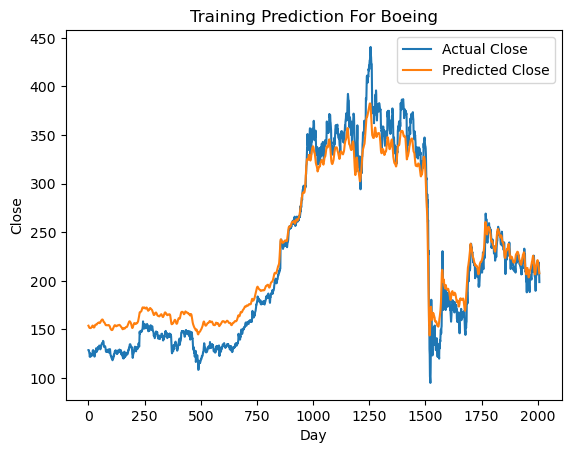

In [31]:
# Plot training prediction for Boeing
plot_training_predictions(new_y_train_BA, train_predictions_BA, 'Boeing')

**Conclusion of training prediction**  
As shown in the plot, we see that the our model fits the training set pretty well; the predictions accurately follow the shape of the target without any signs of severe overfitting. Generally speaking, the the predicted close prices seem to follow the actual close prices more accurately as time elapses.

## Testing

**Functionality of testing_prediction**:
  1. Run the trained LSTM model (`lstm_model`) on the testing feature data (`X_test`) to obtain predictions. Use `torch.no_grad()` to disable gradient tracking during inference.
  2. Convert the model predictions to a numpy array and flatten it to a 1D array.
  3. Create an array of zeros (`dummies`) with the same shape as the testing feature data, plus an additional column for predictions.
  4. Assign the predictions to the first column of `dummies`.
  5. Use the scaler's `inverse_transform` method to convert the standardized predictions back to their original scale.
  6. Copy the converted predictions to `test_predictions`.
  7. Repeat steps 3-6 for the true target values (`y_test`), resulting in `new_y_test`.
  8. Return both `test_predictions` and `new_y_test`.

This function is responsible for generating predictions on the testing data and converting them back to their original scale, enabling the evaluation of the model's performance on unseen data.

In [32]:
def testing_prediction(X_test, y_test, model, device, lookback):
    '''
    Perform testing prediction for LSTM model.

    Args:
    - model: Trained LSTM model.
    - X_BA_test: Testing feature data.
    - y_BA_test: Testing target data.
    - scaler: Scaler object used for standardization.
    - lookback: Number of time steps to look back.
    - device: Device to which the model should be moved (e.g., 'cpu' or 'cuda').

    Returns:
    - test_predictions_BA: Predicted values for the testing data.
    - new_y_test_BA: True target values for the testing data.
    '''

    # Perform testing prediction
    test_predictions = model(X_test.to(device)).detach().numpy().flatten()

    # Create dummies for inverse transformation
    dummies = np.zeros((X_test.shape[0], lookback + 1))
    dummies[:, 0] = test_predictions

    # Inverse transform using the scaler
    dummies = scaler.inverse_transform(dummies)

    # Assign predictions after inverse transformation
    test_predictions = dc(dummies[:, 0])

    # Create dummies for true target values
    dummies = np.zeros((X_test.shape[0], lookback + 1))
    dummies[:, 0] = y_test.flatten()

    # Inverse transform true target values using the scaler
    dummies = scaler.inverse_transform(dummies)

    # Assign true target values after inverse transformation
    new_y_test = dc(dummies[:, 0])

    return test_predictions, new_y_test


In [33]:
# Testing prediction of Boeing Dataset
test_predictions_BA, new_y_test_BA = testing_prediction(X_BA_test, y_BA_test, model=lstm_model, device=device, lookback=7)

In [34]:
def plot_testing_prediction(new_y_test, test_predictions, dataset_name):
    '''
    Plot testing prediction results for a given dataset.

    Args:
    - dataset_name: Name of the dataset for the title.
    - new_y_test_BA: True target values for the testing data.
    - test_predictions_BA: Predicted values for the testing data.
    '''

    # Set the title
    plt.title(f"Testing Prediction For {dataset_name}")

    # Plot the true target values
    plt.plot(new_y_test, label='Actual Close')

    # Plot the predicted values
    plt.plot(test_predictions, label='Predicted Close')

    # Set labels for x and y axes
    plt.xlabel('Day')
    plt.ylabel('Close')

    # Display the legend
    plt.legend()

    # Show the plot
    plt.show()

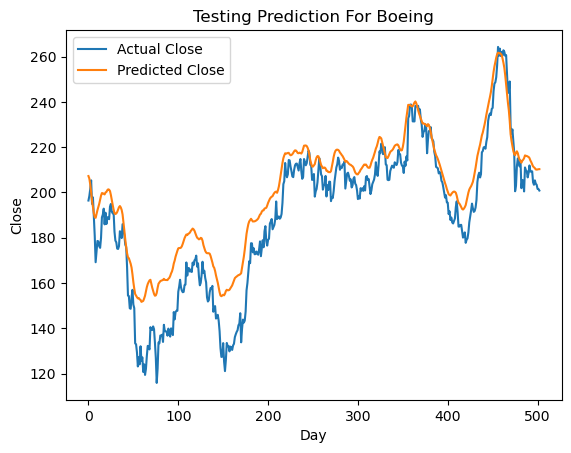

In [35]:
# Plot testing prediction of Beoing
plot_testing_prediction(new_y_test_BA, test_predictions_BA, 'Boeing')

**Conclusion of testing prediction**  
Again, as shown in the plot, we see that the model performs well on the testing set as it succeeds in capturing the general shape of the actual stock price movement by using a lookback period of 7 days under the LSTM model.

## Transfer Learning with Pre-Trained Model

Transfer learning involves reusing a pre-trained model's knowledge for a similar but different task, allowing for faster training and better performance, especially with limited data. We apply transfer learning on the LSTM model pretrained on Boeing dataset so that the Transfer model can do the prediction on Airbus dataset.

**Functionality of `LSTMTransferLearning` class:**
  - Loads the pre-trained LSTM model.
  - Replaces the last layer (usually a linear layer) of the pre-trained model with a new linear layer having output size equal to `num_classes`.
  - Initializes additional attributes `input_size` and `output_size` for time series forecasting.
  - The `forward` method takes the input tensor `x` and passes it through the pre-trained LSTM model, returning the output tensor.

This class is designed for transfer learning tasks where a pre-trained LSTM model is used as a feature extractor, and a new linear layer is added for the new task such as time series forecasting.

In [36]:
class LSTMTransferLearning(nn.Module):
    def __init__(self, input_size, pretrained_model, num_classes):
        """
        Initializes a LSTM model with the specified model and hyperparameters.

        Args:
          input_size: Number of neurons in the input layer.
          pretrained_model: Original pre-trained model.
          num_classes: Number of target variables.
        """
        super(LSTMTransferLearning, self).__init__()

        # Load the pre-trained LSTM model
        self.pretrained_model = pretrained_model

        # Replace the last layer for transfer learning
        # Assuming the last layer is a linear layer
        self.pretrained_model.fc = nn.Linear(self.pretrained_model.hidden_size, num_classes)

        # Additional layers for time series forecasting
        self.input_size = input_size
        self.output_size = num_classes

    def forward(self, x):
        """
        Performs a forward pass on the pre-trained model.

        Args:
          x (torch.Tensor): Data to run the model on.

        Returns:
          torch.Tensor: Output of the model.
        """
        # Forward pass through the pre-trained model
        out = self.pretrained_model(x)
        return out

In [37]:
# Create the transfer model based on the lstm model
transfer_model = LSTMTransferLearning(input_size=1, pretrained_model=lstm_model, num_classes=1)
transfer_model.to(device)
transfer_model

LSTMTransferLearning(
  (pretrained_model): LSTM(
    (lstm): LSTM(1, 32, num_layers=2, batch_first=True)
    (fc): Linear(in_features=32, out_features=1, bias=True)
    (dropout): Dropout(p=0.2, inplace=False)
  )
)

## Apply the trained LSTM model on Airbus dataset

We want to use the same LSTM model on the stock price prediction of the competitor of Boeing, Airbus. We want to see the same LSTM model can successfully predict a different dataset.

In [38]:
# Data processing for Airbus dataset, same as data processing for Boeing dataset
X_Airbus_train, X_Airbus_test, y_Airbus_train, y_Airbus_test = data_processing(Airbus, lookback=7)

In [39]:
# Create Time Series Datasets for Airbus data
train_Airbus_dataset = TimeSeriesDataset(X_Airbus_train, y_Airbus_train)
test_Airbus_dataset = TimeSeriesDataset(X_Airbus_test, y_Airbus_test)

In [40]:
# Load Airbus data
train_Airbus_loader, test_Airbus_loader = load_data(train_Airbus_dataset, test_Airbus_dataset, batch_size=best_batch_size, device=device)

Shape of Input Features (X_batch): torch.Size([32, 7, 1])
Shape of Target Values (y_batch): torch.Size([32, 1])


In [41]:
# Testing predictions on Airbus dataset
test_predictions_Airbus, new_y_test_Airbus = testing_prediction(X_Airbus_test, y_Airbus_test,model=lstm_model, device=device,lookback=7)

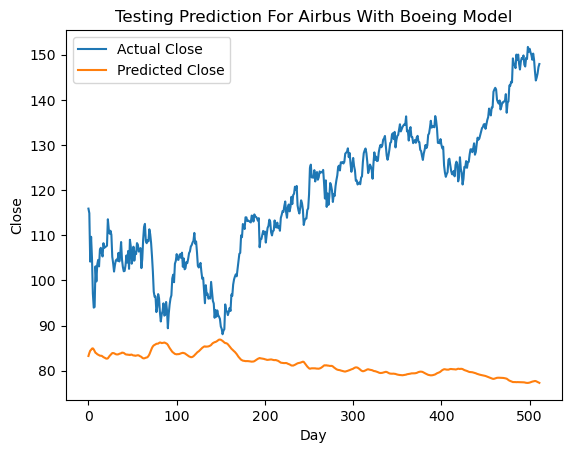

In [42]:
# Plot testind prediction for Airbus dataset using lstm model trained on Boeing dataset
plot_testing_prediction(new_y_test_Airbus, test_predictions_Airbus, 'Airbus With Boeing Model')

We clearly see that model does not perform well with completely wrong predictions. The reason is simple. Our original LSTM model was built by learning features necessary to track stock prices for Boeing; hence, the model did not learn any features necessary to predict the stock prices for the Airbus company.

# Train and test the transfer model on Airbus dataset

We train the transfer model with Airbus training dataset and test it with Airbus testing dataset. We want to check if the retrained transfer model can predict Airbus dataset.

In [43]:
# Mean squared error as loss function
loss_function = nn.MSELoss()

# set optimizer as Adam
optimizer = torch.optim.Adam(transfer_model.parameters(), lr = best_lr)

# Train on the model through the max number of epochs
for epoch in range(best_max_epochs):
  train_one_epoch(train_Airbus_loader, transfer_model)
  validate_one_epoch(test_Airbus_loader, transfer_model)

Epoch: 1
Batch 10, Train Loss: 0.421375
Batch 20, Train Loss: 0.262955
Batch 30, Train Loss: 0.193010
Batch 40, Train Loss: 0.129648
Batch 50, Train Loss: 0.086416
Batch 60, Train Loss: 0.076432
Validation Loss: 0.050353
***************************************************
Epoch: 2
Batch 10, Train Loss: 0.068759
Batch 20, Train Loss: 0.066629
Batch 30, Train Loss: 0.075686
Batch 40, Train Loss: 0.062730
Batch 50, Train Loss: 0.057195
Batch 60, Train Loss: 0.058204
Validation Loss: 0.048047
***************************************************
Epoch: 3
Batch 10, Train Loss: 0.066626
Batch 20, Train Loss: 0.083837
Batch 30, Train Loss: 0.072218
Batch 40, Train Loss: 0.049990
Batch 50, Train Loss: 0.068422
Batch 60, Train Loss: 0.060225
Validation Loss: 0.036147
***************************************************
Epoch: 4
Batch 10, Train Loss: 0.071031
Batch 20, Train Loss: 0.049657
Batch 30, Train Loss: 0.059786
Batch 40, Train Loss: 0.064168
Batch 50, Train Loss: 0.067510
Batch 60, Train L

In [44]:
# Training prediction on Airbus dataset with transfer model
new_y_train_Airbus, train_predictions_Airbus = training_prediction(X_Airbus_train, y_Airbus_train, model=transfer_model, device=device, lookback=7)

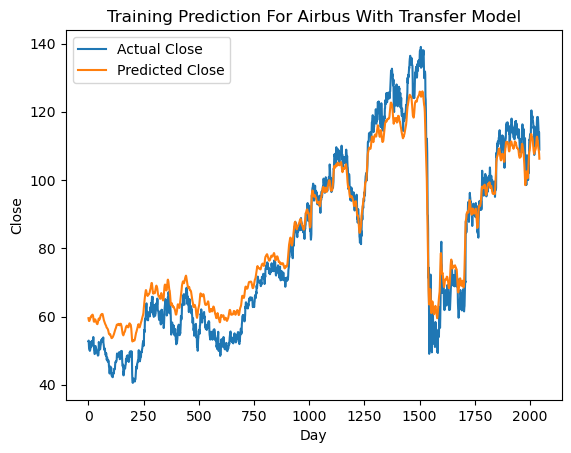

In [45]:
# Plot training prediction on Airbus dataset with transfer model
plot_training_predictions(new_y_train_Airbus, train_predictions_Airbus, 'Airbus With Transfer Model')

Transfer model fits the Airbus training dataset.

In [46]:
# Testing prediction on Airbus dataset with transfer model
test_predictions_Airbus, new_y_test_Airbus = testing_prediction(X_Airbus_test, y_Airbus_test, model=transfer_model, device=device,lookback=7)

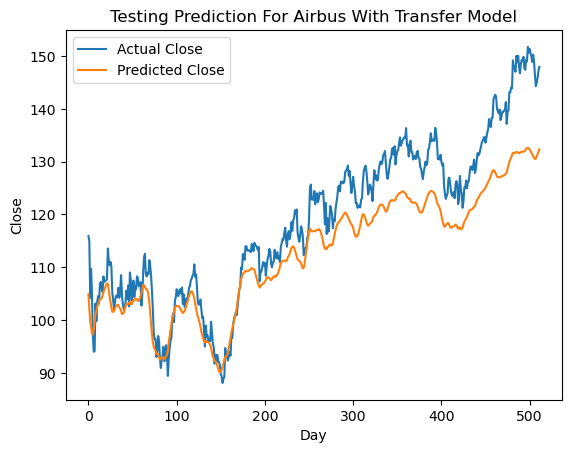

In [47]:
# Plot testing prediction on Airbus dataset with transfer model
plot_testing_prediction(new_y_test_Airbus, test_predictions_Airbus, 'Airbus With Transfer Model')

Transfer model fits the Airbus testing dataset.

In conclusion, the transfer model successfully predict the Airbus dataset.

## Evaluate Boeing data using new transfer model

Transfer model retains the ability to predict on the original dataset due to shared representations and fine-tuning of parameters. We try to apply the transfer model on Boeing dataset to see if it still can successfully predict Boeing stock price.

In [48]:
# Training prediction on Boeing dataset with transfer model
new_y_train_BA, train_predictions_BA = training_prediction(X_BA_train, y_BA_train, model=transfer_model, device=device, lookback=7)

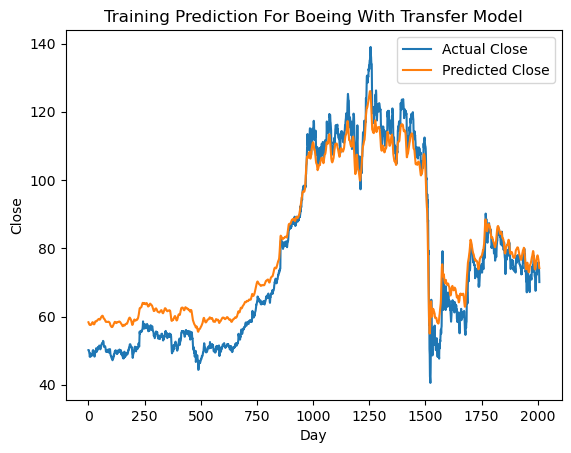

In [49]:
# Plot training prediction for Boeing dataset with transfer model
plot_training_predictions(new_y_train_BA, train_predictions_BA, 'Boeing With Transfer Model')

Transfer model fits Boeing dataset.

In [50]:
# Testing prediction on Boeing dataset with transfer model
test_predictions_BA, new_y_test_BA = testing_prediction(X_BA_test, y_BA_test, model=transfer_model, device=device, lookback=7)

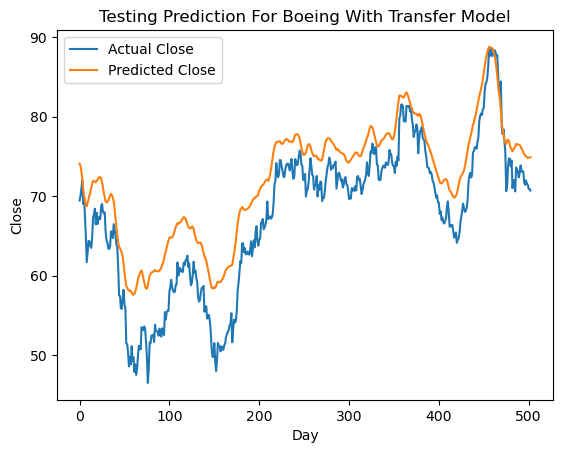

In [51]:
# Plot testing prediction for Boeing dataset with transfer model
plot_testing_prediction(new_y_test_BA, test_predictions_BA, 'Boeing With Transfer Model')

Transfer model fits Boeing dataset.

In conclusion, the newly retrained transfer model can still predict the dataset that the original model is trained on.

## Conclusion

In summary, our initial LSTM model exhibited limitations as it could only effectively forecast stock prices for Boeing, yielding inaccurate predictions for Airbus stock price data. However, with the integration of transfer learning, the model adapted by acquiring new features crucial for accurate predictions of Airbus stock prices while retaining its ability to capture Boeing data features. Consequently, the refined model we developed became proficient in forecasting stock prices for both companies, key players in today's airline industry landscape.